In [54]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

In [55]:
tqdm.pandas()

In [56]:
# loading in datasets 
ipl_balls=pd.read_csv('ball_by_ball.csv')
ipl_matches=pd.read_csv('matches.csv')
lineups=pd.read_csv('lineups.csv')
venue=pd.read_csv('venue.csv')

In [57]:
# creating a table for inning wise details

runs=ipl_balls.groupby(['batting_team_id','bowling_team_id','match_date','kaggle_id','inning_order']).team_runs_from_ball.sum().reset_index()
batsmen_runs=ipl_balls.groupby(['batting_team_id','kaggle_id']).batsman_runs_of_ball.sum().reset_index()
balls = ipl_balls[((ipl_balls.no_balls==0) & (ipl_balls.wides==0))].groupby(['kaggle_id','batting_team_id']).over.count().reset_index()
wickets_1=ipl_balls[(ipl_balls.dismissal_type_id!=2) & (ipl_balls.dismissal_type_id!=11)]
batsmen_who_faced_a_ball=ipl_balls.groupby(['batting_team_id','kaggle_id']).os_batsman_id.nunique().reset_index()
wickets = wickets_1.groupby(['kaggle_id','batting_team_id']).bowler_wicket.count().reset_index()
dots = ipl_balls[ipl_balls.bowler_runs_conceded==0].groupby(['kaggle_id','batting_team_id']).four.count().reset_index()
innings=pd.merge(pd.merge(pd.merge(runs, balls, how='right', on=['kaggle_id','batting_team_id']),wickets, how='outer', on=['kaggle_id','batting_team_id']), dots, on=['kaggle_id','batting_team_id']).reset_index(drop=True)
innings.columns = ['batting_team_id', 'bowling_team_id', 'match_date', 'kaggle_id', 'inning_order','Runs', 'Balls','Wickets','Dots']
innings['econ_rate'] = 6*innings['Runs']/innings['Balls']
innings['econ_rate']=innings['econ_rate'].map("{:,.2f}".format)
innings_1=pd.merge(pd.merge(innings, batsmen_runs, on=['kaggle_id','batting_team_id']), batsmen_who_faced_a_ball, on=['kaggle_id','batting_team_id']).reset_index(drop=True)
innings_1.columns = ['batting_team_id', 'bowling_team_id', 'match_date', 'kaggle_id', 'inning_order','Runs', 'Balls','Wickets','Dots','run_rate','batsmen_runs','batting_players']
innings_1.fillna(0, inplace=True)
innings_1

,batting_team_id,bowling_team_id,match_date,kaggle_id,inning_order,Runs,Balls,Wickets,Dots,run_rate,batsmen_runs,batting_players
0,861,862,18/04/08,335982,1,222,120,3.0,41,11.10,205,5
1,862,861,18/04/08,335982,2,82,91,10.0,55,5.41,63,11
2,858,859,19/04/08,335983,1,240,120,5.0,36,12.00,234,7
3,859,858,19/04/08,335983,2,207,120,4.0,29,10.35,196,6
4,860,864,19/04/08,335984,2,132,91,1.0,31,8.70,122,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1505,863,860,08/05/19,1181766,1,162,120,8.0,46,8.10,152,9
1506,858,860,10/05/19,1181767,2,151,114,4.0,45,7.95,140,6
1507,860,858,10/05/19,1181767,1,147,120,9.0,47,7.35,139,11
1508,857,858,12/05/19,1181768,1,149,120,8.0,51,7.45,146,9


In [58]:
# batsmen inning wise details

b_inn_runs=ipl_balls.groupby(['batting_team_id','bowling_team_id','match_date','kaggle_id','inning_order','os_batsman_id']).batsman_runs_of_ball.sum().reset_index()
b_inn_balls=ipl_balls[ipl_balls.wides==0].groupby(['kaggle_id','os_batsman_id']).over.count().reset_index()
b_inn_out= ipl_balls[(ipl_balls.dismissed_player_id!=0) & (ipl_balls.dismissal_type_id!=11)].groupby(['kaggle_id','dismissed_player_id']).over_ball.count().reset_index()
b_inn_initial=pd.merge(b_inn_runs, b_inn_balls, how='left', on=['kaggle_id','os_batsman_id'])
b_inn_out.columns=['kaggle_id', 'os_batsman_id', 'out']
b_inn_2=pd.merge(b_inn_initial, b_inn_out, how='left', on=['kaggle_id','os_batsman_id']).fillna(0)
b_inn_2

,batting_team_id,bowling_team_id,match_date,kaggle_id,inning_order,os_batsman_id,batsman_runs_of_ball,over,out
0,857,858,03/04/19,1175370,1,13734,13,18.0,1.0
1,857,858,03/04/19,1175370,1,13893,4,7.0,1.0
2,857,858,03/04/19,1175370,1,14059,25,8.0,0.0
3,857,858,03/04/19,1175370,1,14060,17,7.0,0.0
4,857,858,03/04/19,1175370,1,14066,42,32.0,1.0
...,...,...,...,...,...,...,...,...,...
11289,6148,6146,26/04/12,548341,1,13767,26,24.0,0.0
11290,6148,6146,26/04/12,548341,1,14307,24,18.0,1.0
11291,6148,6146,26/04/12,548341,1,15896,78,46.0,1.0
11292,6148,6146,26/04/12,548341,1,16149,12,14.0,1.0


In [59]:
# adding columns to ease later processes

def venue(row):
    a=ipl_matches[ipl_matches.kaggle_id==row['kaggle_id']]
    return a.venue_id.values[0]
b_inn_2['venue_id']=b_inn_2.apply(venue, axis=1)

def batting_position(row):
    a=lineups[lineups.match_date==row['match_date']]
    b=a[a.Batsman==row['os_batsman_id']]
    if len(b)==0:
        pass
    else:
        return b.batting_position.values[0]

def year(row):
    return str(20)+str(row['match_date'][6:8])

b_inn_2['batting_position']=b_inn_2.progress_apply(batting_position,axis=1)
b_inn_2['year']=b_inn_2.progress_apply(year,axis=1)
b_inn_2.dropna(inplace=True)

100%|██████████| 11294/11294 [00:00<00:00, 79194.83it/s]


In [60]:
# factors created use to rank batsmen innings

def batting_impact(row):
    a=b_inn_2[b_inn_2.year==row['year']]
    b=a[a.batting_position==row['batting_position']]
    return row['batsman_runs_of_ball']*b.out.sum()/b.batsman_runs_of_ball.sum()
b_inn_2['batting_impact']=b_inn_2.progress_apply(batting_impact, axis=1)

def venue_impact(row):
    a=b_inn_2[b_inn_2.venue_id==row['venue_id']]
    b=a[a.year==row['year']]
    return row['batsman_runs_of_ball']*b.out.sum()/b.batsman_runs_of_ball.sum()
b_inn_2['venue_impact']=b_inn_2.progress_apply(venue_impact, axis=1)

def pitch_impact(row):
    a=innings_1[innings_1.kaggle_id==row['kaggle_id']]
    return row['batsman_runs_of_ball']*a.Balls.sum()/a.Runs.sum()
b_inn_2['pitch_impact']=b_inn_2.progress_apply(pitch_impact, axis=1)


def contribution_to_result(row):
    a=innings_1[innings_1.kaggle_id==row['kaggle_id']]
    b=a[a.batting_team_id==row['batting_team_id']]
    if b.Wickets.values[0]!=10:
        team_run_rate=b.Runs.sum()/b.Balls.sum()
    else:
        team_run_rate=b.Runs.sum()/120
    c=a[a.batting_team_id==row['bowling_team_id']]
    if len(c)==0:
        other_team_run_rate=team_run_rate
    elif c.Wickets.values[0]!=10:
        other_team_run_rate=c.Runs.sum()/c.Balls.sum()
    else:
        other_team_run_rate=c.Runs.sum()/120
    return row['batsman_runs_of_ball']*team_run_rate/other_team_run_rate
b_inn_2['contribution_to_result']=b_inn_2.progress_apply(contribution_to_result, axis=1)

def innings_impact(row):
    a=b_inn_2[b_inn_2.inning_order==row['inning_order']]
    b=a[a.year==row['year']]
    return row['batsman_runs_of_ball']*b.out.sum()/b.batsman_runs_of_ball.sum()
b_inn_2['innings_impact']=b_inn_2.progress_apply(innings_impact, axis=1)

def other_team_impact(row):
    a=b_inn_2[b_inn_2.kaggle_id==row['kaggle_id']]
    b=a[a.batting_team_id==row['bowling_team_id']]
    if b.over.sum()<40:
        return 0
    else:
        return row['batsman_runs_of_ball']/b.batsman_runs_of_ball.sum()
b_inn_2['other_team_impact']=b_inn_2.progress_apply(other_team_impact, axis=1)

def team_impact(row):
    a=b_inn_2[b_inn_2.kaggle_id==row['kaggle_id']]
    b=a[a.batting_team_id==row['batting_team_id']]
    return row['batsman_runs_of_ball']/b.batsman_runs_of_ball.sum()
b_inn_2['team_impact']=b_inn_2.progress_apply(team_impact, axis=1)

def strike_rate_impact(row):
    a=ipl_balls[ipl_balls.kaggle_id==row['kaggle_id']]
    b=a[a.batting_team_id==row['batting_team_id']]
    c=b[b.os_batsman_id!=row['os_batsman_id']]
    runs=c.batsman_runs_of_ball.sum()
    d=c[c.wides==0]
    balls=len(d)
    return row['batsman_runs_of_ball']*row['batsman_runs_of_ball']*balls/(row['over']*runs)

b_inn_2['strike_rate_impact']=b_inn_2.progress_apply(strike_rate_impact, axis=1)
b_inn_2.dropna(inplace=True)

100%|██████████| 11046/11046 [00:42<00:00, 260.43it/s]


In [61]:
# table with impacts only
b_inn=b_inn_2[['batting_impact', 'venue_impact',
       'pitch_impact', 'contribution_to_result', 'innings_impact',
       'team_impact', 'strike_rate_impact','other_team_impact']]

<AxesSubplot:>

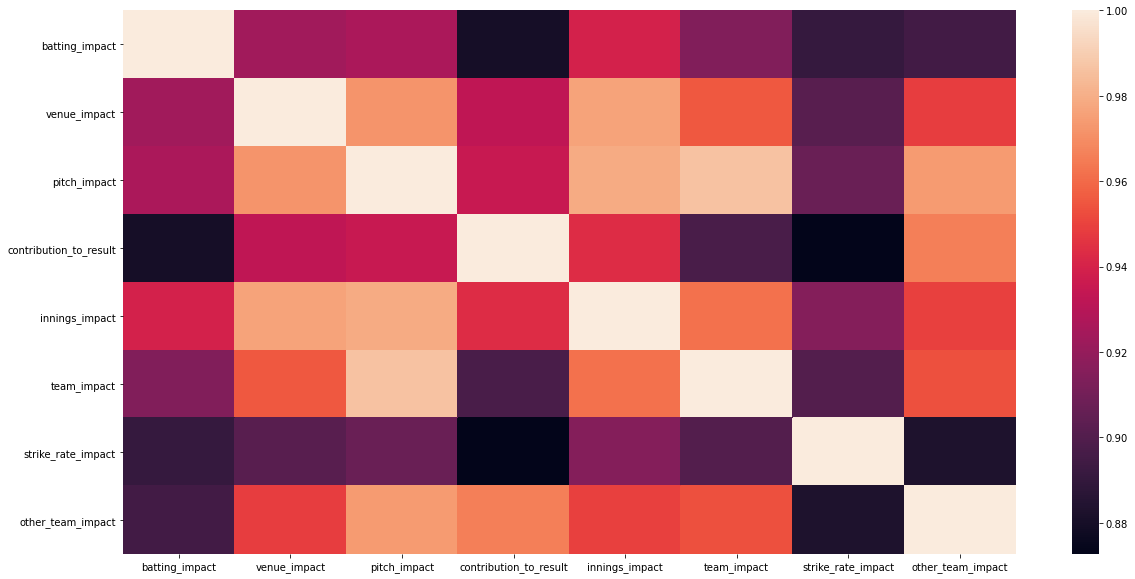

In [62]:
# looking at correlation between different factors

import seaborn as sns
plt.figure(figsize=(20,10))
c= b_inn.corr()
sns.heatmap(c)

In [63]:
from factanal.wrapper import factanal

In [64]:
# factor analysis to account for correlation

fa_res = factanal(b_inn, factors=1, scores='regression', rotation='promax', verbose=True, return_dict=True)
a = []
for x in fa_res['scores']:
    a.append(x[0])

b_inn_2['rating'] = a

Uniquenesses: 
        batting_impact           venue_impact           pitch_impact 
                 0.129                  0.044                  0.006 
contribution_to_result         innings_impact            team_impact 
                 0.111                  0.032                  0.031 
    strike_rate_impact      other_team_impact 
                 0.163                  0.050 

Loadings:
                       Factor1
batting_impact         0.934  
venue_impact           0.977  
pitch_impact           0.997  
contribution_to_result 0.943  
innings_impact         0.984  
team_impact            0.985  
strike_rate_impact     0.915  
other_team_impact      0.975  

               Factor1
SS loadings      7.435
Proportion Var   0.929

Test of the hypothesis that 1 factor is sufficient.
The chi square statistic is 21887.8 on 20 degrees of freedom.
The p-value is 0 



In [65]:
b_inn_2

,batting_team_id,bowling_team_id,match_date,kaggle_id,inning_order,os_batsman_id,batsman_runs_of_ball,over,out,venue_id,...,year,batting_impact,venue_impact,pitch_impact,contribution_to_result,innings_impact,other_team_impact,team_impact,strike_rate_impact,rating
0,857,858,03/04/19,1175370,1,13734,13,18.0,1.0,116,...,2019,0.372699,0.458624,10.297030,16.616541,0.460877,0.109244,0.079268,6.404341,-0.318390
1,857,858,03/04/19,1175370,1,13893,4,7.0,1.0,116,...,2019,0.119054,0.141115,3.168317,5.112782,0.141808,0.033613,0.024390,1.628571,-0.766077
2,857,858,03/04/19,1175370,1,14059,25,8.0,0.0,116,...,2019,1.057757,0.881969,19.801980,31.954887,0.886302,0.210084,0.152439,63.511691,0.324074
3,857,858,03/04/19,1175370,1,14060,17,7.0,0.0,116,...,2019,0.886443,0.599739,13.465347,21.729323,0.602685,0.142857,0.103659,32.017493,-0.090124
4,857,858,03/04/19,1175370,1,14066,42,32.0,1.0,116,...,2019,1.832649,1.481707,33.267327,53.684211,1.488987,0.352941,0.256098,40.214139,1.158333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11289,6148,6146,26/04/12,548341,1,13767,26,24.0,0.0,117,...,2012,0.964091,1.027291,18.571429,28.943396,1.004979,0.173333,0.156627,19.314286,0.257066
11290,6148,6146,26/04/12,548341,1,14307,24,18.0,1.0,117,...,2012,0.933370,0.948269,17.142857,26.716981,0.927673,0.160000,0.144578,22.985915,0.167974
11291,6148,6146,26/04/12,548341,1,15896,78,46.0,1.0,117,...,2012,2.731034,3.081874,55.714286,86.830189,3.014936,0.520000,0.469880,111.219368,2.730960
11292,6148,6146,26/04/12,548341,1,16149,12,14.0,1.0,117,...,2012,0.475876,0.474134,8.571429,13.358491,0.463836,0.080000,0.072289,7.079777,-0.401099


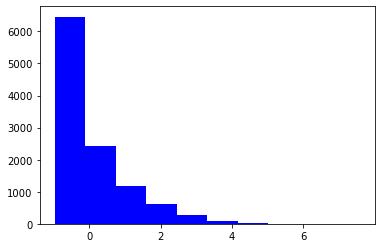

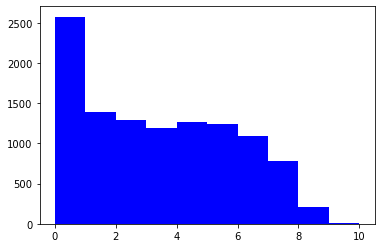

In [66]:
# distribution of batsmen indeces 
plt.hist(b_inn_2['rating'].values, 10, facecolor='blue')
plt.show()
# transforming index values and plotting distribution of new values after transforming through power distribution
# due to shape of data
pt = PowerTransformer()
data=b_inn_2['rating'].values
data_1 = data.reshape((len(data),1))
b_inn_2['adj_index']=pt.fit_transform(data_1)
a=b_inn_2['adj_index'].values
b_inn_2['final_index']=10*(b_inn_2['adj_index']-np.min(a))/(np.max(a)-np.min(a))
plt.hist(b_inn_2['final_index'].values, 10, facecolor='blue')
plt.show()

In [67]:
# table with year wise average rating for batsmen 
b_inn_2['final_index']=b_inn_2['final_index'].astype('float64')
byw_1= b_inn_2.groupby(['os_batsman_id','year']).final_index.sum().reset_index()
byw_2= b_inn_2.groupby(['os_batsman_id','year']).kaggle_id.count().reset_index()
byw_3= b_inn_2.groupby(['os_batsman_id','year']).batsman_runs_of_ball.sum().reset_index()
batsmen_year_wise=pd.merge(pd.merge(byw_1, byw_2), byw_3)
batsmen_year_wise=batsmen_year_wise[batsmen_year_wise.kaggle_id>=5].reset_index(drop=True)
batsmen_year_wise.columns = ['Batsman','Year','Cumulative rating','Innings played','Runs scored']
batsmen_year_wise['Average rating per match']=batsmen_year_wise['Cumulative rating']/batsmen_year_wise['Innings played']
batsmen_year_wise.sort_values('Average rating per match', ascending=False)[0:20]

,Batsman,Year,Cumulative rating,Innings played,Runs scored,Average rating per match
176,13910,2008,71.114384,10,614,7.111438
174,13905,2019,81.205308,12,692,6.767109
172,13905,2016,103.805087,16,848,6.487818
700,25761,2009,69.079274,11,483,6.279934
611,14606,2014,48.567691,8,394,6.070961
425,14100,2016,90.895551,15,860,6.059703
556,14270,2014,48.016524,8,324,6.002065
43,13737,2018,77.373498,13,599,5.951808
395,14095,2017,34.958432,6,289,5.826405
745,987410,2010,86.669300,15,617,5.777953


In [ ]:
# It seems I've had a data leak somewhere (Kohli at 860 runs in 2016), but I can't figure out where exactly
# I set up bowler ratings in a similar way, creating 6 different factors looking at various bowling statistics 
# and employing a factor analysis technique there as well

# From there I used a weighted rolling average of these post match ratings, to give all players a pre match rating
# and set up batting team strengths/bowling team strengths accordingly for prediction IPL 2020 outcomes